# 1- Load packages


## 1-A Import

In [1]:
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from plotly.offline import init_notebook_mode,iplot
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from nltk.tokenize.casual import TweetTokenizer
from nltk.stem.lancaster import LancasterStemmer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from nltk.probability import FreqDist
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import chart_studio.plotly as py
from textblob import TextBlob
from nltk.text import Text  
from pandas import Series
from plotly import tools
import networkx as nx
from PIL import Image
import seaborn as sns
import nltk, string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import pandas as pd
import numpy as np
import nltk as nlp
import warnings
import sys
import os
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prajwalkaushal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prajwalkaushal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prajwalkaushal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 2-A Setup

In [2]:
%matplotlib inline
%precision 4
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
np.set_printoptions(suppress=True)
pd.set_option("display.precision", 15)

## 2-B Version

In [3]:
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

pandas: 2.0.3
numpy: 1.24.4
Python: 3.8.19 (default, Mar 20 2024, 15:00:34) 
[Clang 14.0.6 ]


# 3. Exploratory Data Analysis

This dataset contains the tweets related to the 2014 Indian elections. They were collected using Twitter API using Social Feed Manager.


In [4]:
df = pd.read_csv("Data/congbjp.csv")
df.dropna(axis = 0, inplace = True)

- congress = 1
- bjp = 0

In [5]:
df["Party_log"] = [1 if each == "Congress" else 0 for each in df.Party]
print(df.shape)
df.head()

(12415, 4)


,Party,Handle,Tweet,Party_log
0,Congress,incindia,While the BJP govt tries to hide from the trut...,1
1,Congress,incindia,On almost a regular basis there are cases regi...,1
2,Congress,incindia,Leader of Congress Party in Lok Sabha Shri @ad...,1
3,Congress,incindia,With each day that this govt. keeps the people...,1
4,Congress,incindia,Our economy is growing faster than US &amp; Ch...,1


In [6]:
df.Tweet[0]

"While the BJP govt tries to hide from the truth, the question on every Indian's mind is, how did the world's fastest growing economy end up in a situation where growth of all sectors have seen a sharp fall? No amount of media gimmicks can change the facts.  https://t.co/9EDo00BR6V"

In [7]:
df.Party.value_counts()

Party
Congress    6625
BJP         5790
Name: count, dtype: int64

In [8]:
def extract_hash_tags(twt):
        hashtag = re.findall('(\#[A-Za-z_]+)', twt)
        if hashtag:
            return hashtag
        else:
             return ""

In [9]:
df_h = df.copy()
df_h['top_hashtags'] = df_h['Tweet'].apply(lambda x: extract_hash_tags(x))

hashtags_list_bjp = []
hashtags_list_cong = []

for n in range(len(df_h['top_hashtags'])):
    if df_h['Party_log'][n] == 0:
        hashtags_list_bjp += df_h['top_hashtags'][n]
    elif df_h['Party_log'][n] == 1:
        hashtags_list_cong += df_h['top_hashtags'][n]

Text(0.5, 1.0, "Congress' 6 most used hashtags")

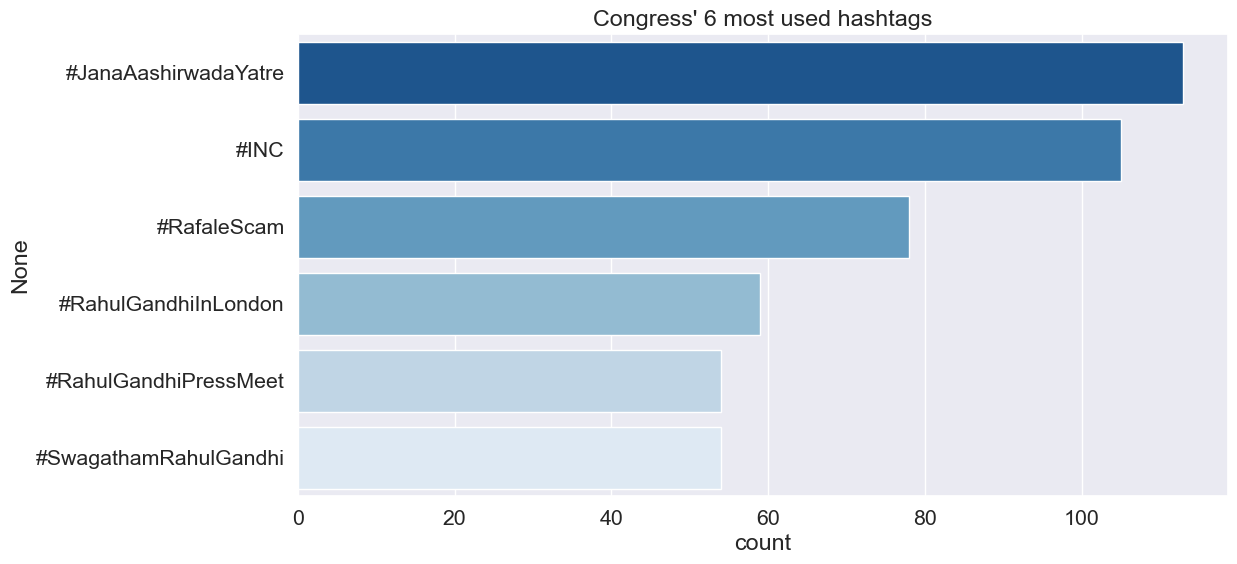

In [10]:
Cong_tophashtags = Series(hashtags_list_cong).value_counts().head(n=6)
sns.set_style("white")
sns.set(font_scale=1.4)
plt.figure(figsize=(12,6))
sns.barplot(x=Cong_tophashtags, y=Cong_tophashtags.index,  orient='h', palette="Blues_r").set_title("Congress' 6 most used hashtags")

Text(0.5, 1.0, "BJP' 6 most used hashtags")

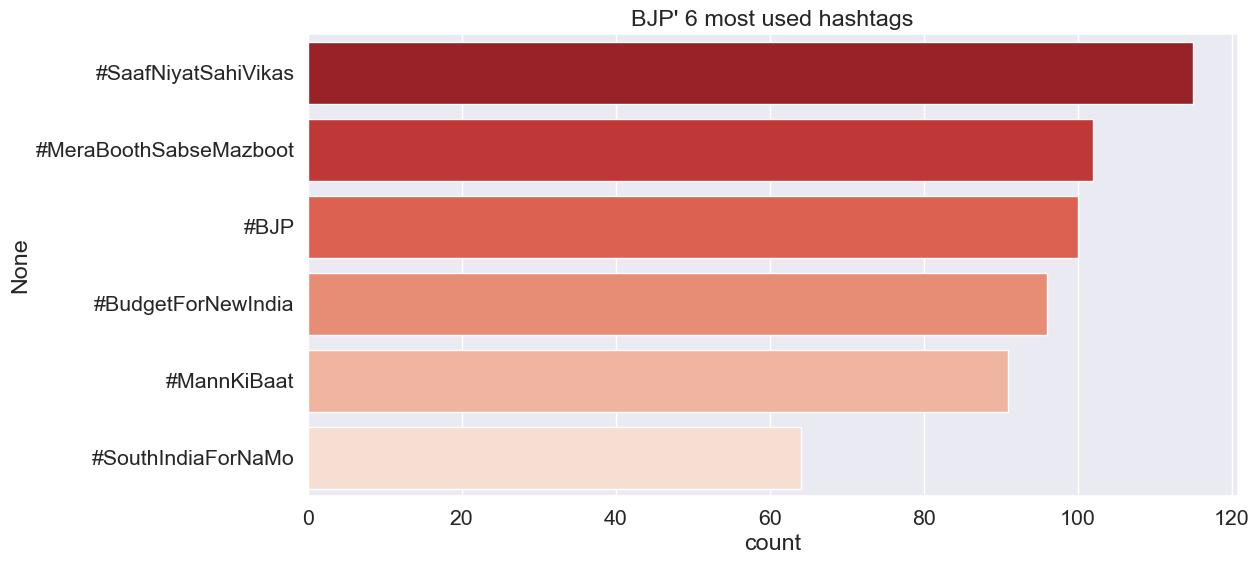

In [11]:
Bjp_tophashtags = Series(hashtags_list_bjp).value_counts().head(n=6)
sns.set_style("white")
sns.set(font_scale=1.4)
plt.figure(figsize=(12, 6))
sns.barplot(x=Bjp_tophashtags, y=Bjp_tophashtags.index, orient='h', palette="Reds_r").set_title("BJP' 6 most used hashtags")

In [12]:
len(set(stopwords.words("english"))) , len(set(STOPWORDS)) , len(set(STOP_WORDS))

(179, 192, 326)

In [13]:
print(set(stopwords.words("english")))

{'the', 'against', 'as', 'haven', 'needn', 'can', 'will', 'o', 'mustn', 're', "don't", 'having', "it's", 'out', 'now', "you'd", 't', 'under', 'don', 'if', 'me', 'here', 'doesn', "that'll", 'then', "isn't", 've', 'ours', 'll', 'doing', 'again', 'until', 'up', 'is', 'where', 'her', 'and', 'a', 'are', "you've", "she's", 'all', 'should', 'do', 'same', 'who', 'myself', 'which', 'did', 'being', 'those', "shan't", "doesn't", 'been', 'their', 'isn', 'most', 'not', 'd', "didn't", 'shouldn', "shouldn't", 'down', 'than', 'was', 'through', 'over', 'mightn', 'won', 'its', 'below', "weren't", 'few', 'for', 'wasn', 'you', 'that', 'we', 'from', 'weren', "mustn't", 'an', "wouldn't", 'am', 'his', "haven't", 'have', 'both', 'before', 'itself', 'how', 'some', 'with', 'after', 'in', 'very', 'own', 'why', 'themselves', 'my', "wasn't", 'hadn', 'your', 'm', 'yours', 'he', 'hasn', 'further', "mightn't", 'off', 'y', 'but', 'yourself', 'were', 'of', "needn't", "hadn't", 'or', 'ma', "hasn't", 'whom', 'it', 'about

In [14]:
print(set(STOPWORDS))

{'the', 'against', 'as', "there's", 'can', 'like', "they're", 'cannot', "here's", "don't", 'having', "it's", 'out', "you'd", "that's", 'under', 'if', 'me', 'here', 'else', 'then', "isn't", 'ours', "he's", 'doing', 'again', 'until', 'up', 'is', "we'd", "he'll", "when's", 'where', 'her', 'and', "who's", "how's", 'a', 'are', "you've", "she's", 'all', 'should', 'do', 'same', 'who', 'myself', 'which', 'did', 'being', 'those', "shan't", "doesn't", 'been', "i've", "where's", 'their', "she'd", 'otherwise', 'most', 'not', "we're", "didn't", "why's", "shouldn't", 'down', 'than', 'was', 'could', 'through', 'over', 'below', 'its', "weren't", 'few', 'for', 'that', "i'm", 'you', 'we', 'from', "mustn't", 'an', 'k', "wouldn't", 'however', 'am', 'his', "haven't", 'both', 'have', 'before', 'itself', 'how', "let's", 'some', 'with', 'after', 'in', 'very', 'own', 'why', 'themselves', 'my', "wasn't", "he'd", 'your', 'yours', 'he', 'com', 'further', 'off', 'shall', 'but', 'yourself', 'were', 'of', 'r', "i'd"

In [15]:
print(set(STOP_WORDS))

{'nevertheless', 'the', 'against', 'thence', 'please', '‘ll', 'can', 'full', 'back', 'onto', 'next', 're', 'serious', 'beforehand', 'either', 'eleven', 'whereby', 'out', 'another', 'anyhow', 'if', 'seem', 'here', 'then', 'used', '‘s', 'ours', 'doing', 'again', 'is', "'ll", 'one', 'her', 'and', 'seemed', 'anywhere', 'besides', 'all', 'same', 'perhaps', 'moreover', "n't", 'which', 'several', 'two', 'say', "'d", 'being', 'first', "'s", 'whatever', 'been', 'their', 'give', 'otherwise', 'not', 'most', 'alone', 'must', 'might', 'hereafter', 'due', 'anyway', 'last', 'call', 'through', 'whither', "'m", 'few', 'that', 'we', 'empty', 'almost', 'whereafter', 'an', 'however', 'often', 'am', 'less', 'before', 'itself', '‘d', 'seems', 'after', 'in', "'ve", 'own', 'may', 'n‘t', 'herein', 'my', 'whoever', 'keep', 'sometime', '’ve', 'yourself', 'were', 'thereby', 'show', 'nothing', 'latterly', 'ten', 'therein', 'beyond', 'someone', 'it', 'neither', 'together', 'what', 'our', 'seeming', 'also', 'more', 

In [16]:
# created 2 different class as congress and bjp
congress=df[df.Party=="Congress"]
bjp=df[df.Party=="BJP"]

In [17]:
#add some unnecessary words to STOPWORDS list
STOPWORDS.add("rt")
STOPWORDS.add("s")
STOPWORDS.add("u")
STOPWORDS.add("amp")
STOPWORDS.add("th")
STOPWORDS.add("will")
STOPWORDS.add("t")
STOPWORDS.add("m")

In [18]:
#Cleaning congrress party tweets 
congress_list=[]
for d in congress.Tweet:
    d=re.sub(r'http\S+', '', d) #remove links
    d=re.sub("[^a-zA-Z]", " ", d) #remove all characters except letters
    d=d.lower() #convert all words to lowercase
    d=nltk.word_tokenize(d) #split sentences into word
    d=[word for word in d if not word in STOPWORDS] #remove the stopwords
    lemma=nlp.WordNetLemmatizer() 
    d=[lemma.lemmatize(word) for word in d] #identify the correct form of the word in the dictionary
    d=" ".join(d)
    congress_list.append(d) #append words to list

In [19]:
#same process as before
bjp_list=[]
for r in bjp.Tweet:
    r=re.sub(r'http\S+', '', r)
    r=re.sub("[^a-zA-Z]", " ", r)
    r=r.lower()
    r=nltk.word_tokenize(r)
    r=[word for word in r if not word in STOPWORDS]
    lemma=nlp.WordNetLemmatizer()
    r=[lemma.lemmatize(word) for word in r]
    r=" ".join(r)
    bjp_list.append(r)

In [20]:
#first 5 tweets in the list of the congress
congress_list[0:5]

['bjp govt try hide truth question every indian mind world fastest growing economy end situation growth sector seen sharp fall amount medium gimmick change fact',
 'almost regular basis case registered bjp leader sexual harassment rape punitive action taken case ruling party setting precedent heinous crime go unpunished',
 'leader congress party lok sabha shri adhirrcinc speaks medium nrc list released govt',
 'day govt keep people kashmir imprisoned reiterating disregard humanity human right jnksilenced',
 'economy growing faster u china claimed fm nsitharaman point country left wondering govt clue growth rate even mean gdpinicu']

In [21]:
#first 5 tweets in the list of the bjp
bjp_list[0:5]

['shri jpnadda address public meeting chatra jharkhand',
 'schedule union home minister bjp national president shri amitshah public program dadra nagar haveli maharashtra september watch',
 'picture bjp national working president shri jpnadda addressing ujjwala didi sammelan palamu jharkhand',
 'record level loan recovery reached fy recovery r lakh crore r crore fy gross npa come r lakh crore r crore december finance minister smt nsitharaman',
 'picture bjp national working president shri jpnadda addressing st morcha sammelan gumla jharkhand']

However I would like to review these tweets word by word. So I split sentences into words and remove unnecessary punctuation characters:

In [22]:
congress_tweets=str(congress_list).split()
congress_tweets=[word.replace("'","") for word in congress_tweets ]
congress_tweets=[word.replace("[", "") for word in congress_tweets ]
congress_tweets=[word.replace("]","") for word in congress_tweets ]
congress_tweets=[word.replace(",", "") for word in congress_tweets ]

bjp_tweets=str(bjp_list).split()
bjp_tweets=[word.replace("'","") for word in bjp_tweets ]
bjp_tweets=[word.replace("[", "") for word in bjp_tweets ]
bjp_tweets=[word.replace("]","") for word in bjp_tweets ]
bjp_tweets=[word.replace(",", "") for word in bjp_tweets ]

In [23]:
#Now lets check length of the two lists :
print("Congress tweets word length:",len(congress_tweets))
print("BJP tweets word length:",len(bjp_tweets))

Congress tweets word length: 104801
BJP tweets word length: 90302


In [24]:
#FreqDist records the number of times each words are used. 
fdist_congress = FreqDist(congress_tweets)
fdist_bjp=FreqDist(bjp_tweets)

In [25]:
print("Frequency of Words : Congress")
fdist_congress

Frequency of Words : Congress


FreqDist({'congress': 3195, 'president': 2689, 'rahulgandhi': 2653, 'modi': 1679, 'govt': 1317, 'india': 1032, 'pm': 1022, 'bjp': 818, 'people': 677, 'indian': 509, ...})

In [26]:
print("Frequency of Words : BJP")
fdist_bjp

Frequency of Words : BJP


FreqDist({'pm': 2766, 'shri': 2601, 'narendramodi': 1651, 'modi': 1290, 'bjp': 1164, 'amitshah': 1077, 'live': 1031, 'india': 992, 'congress': 705, 'people': 604, ...})

In [27]:
cong_freqw=Series(fdist_congress).sort_values(ascending=False).head(15)
bjp_freqw=Series(fdist_bjp).sort_values(ascending=False).head(15)

Text(0.5, 1.0, "Congress' 15 most used words")

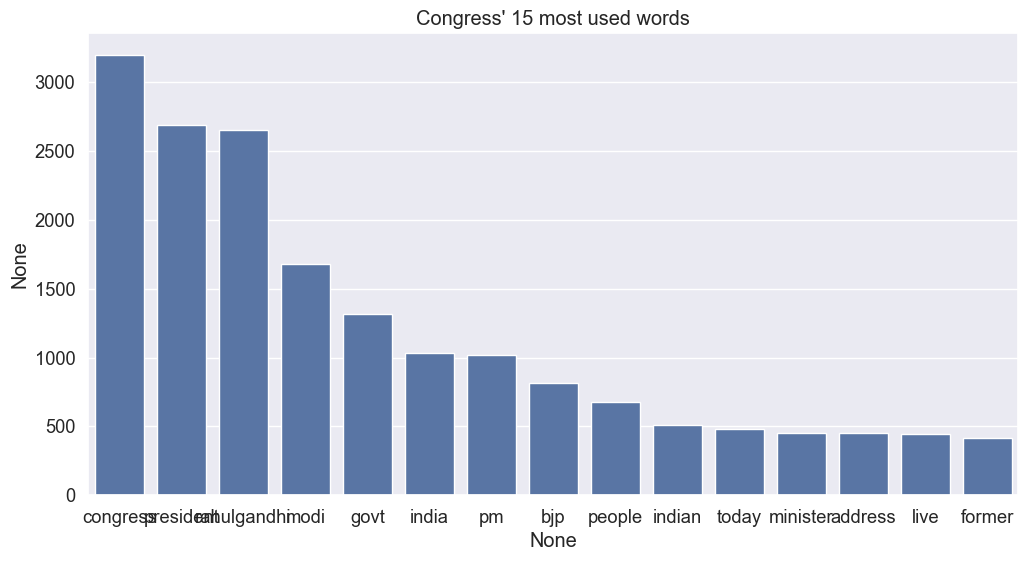

In [28]:
sns.set_style("white")
sns.set(font_scale=1.2)
plt.figure(figsize=(12,6))
sns.barplot(x=cong_freqw.index, y=cong_freqw).set_title("Congress' 15 most used words")

Text(0.5, 1.0, "BJP' 15 most used words")

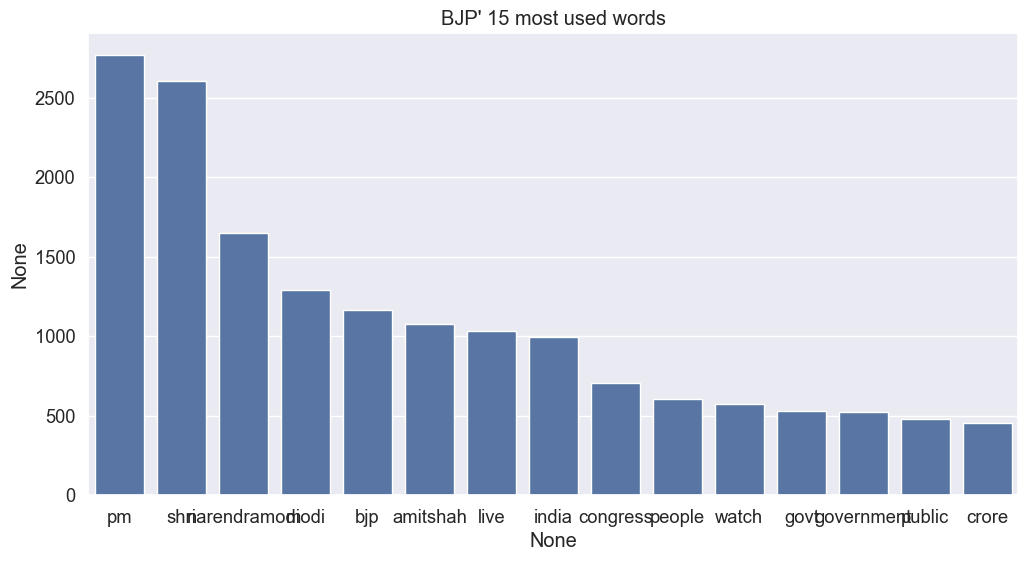

In [29]:
sns.set_style("white")
sns.set(font_scale=1.2)
plt.figure(figsize=(12,6))
sns.barplot(x=bjp_freqw.index, y=bjp_freqw).set_title("BJP' 15 most used words")

In [30]:
#I decide to merge the two lists and the word frequencies in one dataframe for better analysis :
de=pd.DataFrame(list(fdist_congress.items()), columns = ["Word","FrequencyCongress"])
re=pd.DataFrame(list(fdist_bjp.items()), columns = ["Word","FrequencyBJP"])
WFreq=pd.merge(de,re,on='Word')
WFreq.head()

,Word,FrequencyCongress,FrequencyBJP
0,bjp,818,1164
1,govt,1317,532
2,try,21,12
3,hide,29,4
4,truth,153,18


I also categorized the word frequencies into 5 categories : 

- If a word is used less than **50**, it is in the **Very Low** group.

- If it's used between **50** and **200** times, it is in the **Low** group.

- If it's used between **200** and **750** times, it is in the **Medium** group.

- If it's used between **750** and **1500** times, it is in the **High** group.

- If usage of a word is greater than **1500**, it is in the **Very High** group.

In [31]:
congressclass=[] 
for each in WFreq.FrequencyCongress:
    if each<50:
        congressclass.append("Very Low")
    elif 49<each<200:
        congressclass.append("Low")
    elif 199<each<750:
        congressclass.append("Medium")
    elif 749<each<1500:
        congressclass.append("High")
    else:
        congressclass.append("Very High")
        
WFreq["congressclass"]=congressclass

In [32]:
bjpclass=[] 
for each in WFreq.FrequencyBJP:
    if each<50:
        bjpclass.append("Very Low")
    elif 49<each<200:
        bjpclass.append("Low")
    elif 199<each<750:
        bjpclass.append("Medium")
    elif 749<each<1500:
        bjpclass.append("High")
    else:
        bjpclass.append("Very High")
        
WFreq["bjpclass"]=bjpclass

In [33]:
WFreq.head()

,Word,FrequencyCongress,FrequencyBJP,congressclass,bjpclass
0,bjp,818,1164,High,High
1,govt,1317,532,High,Medium
2,try,21,12,Very Low,Very Low
3,hide,29,4,Very Low,Very Low
4,truth,153,18,Low,Very Low


In [34]:
congressveryhigh=WFreq[WFreq.congressclass=="Very High"]
congresshigh=WFreq[WFreq.congressclass=="High"]
congressmedium=WFreq[WFreq.congressclass=="Medium"]
congresslow=WFreq[WFreq.congressclass=="Low"]
congressverylow=WFreq[WFreq.congressclass=="Very Low"]

In [35]:
vhvh=congressveryhigh[WFreq.bjpclass=="Very High"]
vhh=congressveryhigh[WFreq.bjpclass=="High"]
vhm=congressveryhigh[WFreq.bjpclass=="Medium"]
vhl=congressveryhigh[WFreq.bjpclass=="Low"]
vhvl=congressveryhigh[WFreq.bjpclass=="Very Low"]

hvh=congresshigh[WFreq.bjpclass=="Very High"]
hh=congresshigh[WFreq.bjpclass=="High"]
hm=congresshigh[WFreq.bjpclass=="Medium"]
hl=congresshigh[WFreq.bjpclass=="Low"]
hvl=congresshigh[WFreq.bjpclass=="Very Low"]

mvh=congressmedium[WFreq.bjpclass=="Very High"]
mh=congressmedium[WFreq.bjpclass=="High"]
mm=congressmedium[WFreq.bjpclass=="Medium"]
ml=congressmedium[WFreq.bjpclass=="Low"]
mvl=congressmedium[WFreq.bjpclass=="Very Low"]

lvh=congresslow[WFreq.bjpclass=="Very High"]
lh=congresslow[WFreq.bjpclass=="High"]
lm=congresslow[WFreq.bjpclass=="Medium"]
ll=congresslow[WFreq.bjpclass=="Low"]
lvl=congresslow[WFreq.bjpclass=="Very Low"]

vlvh=congressverylow[WFreq.bjpclass=="Very High"]
vlh=congressverylow[WFreq.bjpclass=="High"]
vlm=congressverylow[WFreq.bjpclass=="Medium"]
vll=congressverylow[WFreq.bjpclass=="Low"]
vlvl=congressverylow[WFreq.bjpclass=="Very Low"]

I created these categories to create a matrix

In [37]:
trace5 = go.Scatter(y=vhvh.FrequencyCongress, x=vhvh.FrequencyBJP,text=vhvh.Word,mode='markers+text')
trace4 = go.Scatter(y=vhh.FrequencyCongress, x=vhh.FrequencyBJP,text=vhh.Word,mode='markers+text')
trace3 = go.Scatter(y=vhm.FrequencyCongress, x=vhm.FrequencyBJP,text=vhm.Word,mode='markers+text')
trace2 = go.Scatter(y=vhl.FrequencyCongress, x=vhl.FrequencyBJP,text=vhl.Word,mode='markers+text')
trace1 = go.Scatter(y=vhvl.FrequencyCongress, x=vhvl.FrequencyBJP,text=vhvl.Word,mode='markers+text')

trace10 = go.Scatter(y=hvh.FrequencyCongress, x=hvh.FrequencyBJP,text=hvh.Word,mode='markers+text')
trace9 = go.Scatter(y=hh.FrequencyCongress, x=hh.FrequencyBJP,text=hh.Word,mode='markers+text')
trace8 = go.Scatter(y=hm.FrequencyCongress, x=hm.FrequencyBJP,text=hm.Word,mode='markers+text')
trace7 = go.Scatter(y=hl.FrequencyCongress, x=hl.FrequencyBJP,text=hl.Word,mode='markers+text')
trace6 = go.Scatter(y=hvl.FrequencyCongress, x=hvl.FrequencyBJP,text=hvl.Word,mode='markers+text')

trace15 = go.Scatter(y=mvh.FrequencyCongress, x=mvh.FrequencyBJP,text=mvh.Word,mode='markers+text')
trace14 = go.Scatter(y=mh.FrequencyCongress, x=mh.FrequencyBJP,text=mh.Word,mode='markers+text')
trace13 = go.Scatter(y=mm.FrequencyCongress, x=mm.FrequencyBJP,text=mm.Word,mode='markers+text')
trace12 = go.Scatter(y=ml.FrequencyCongress, x=ml.FrequencyBJP,text=ml.Word,mode='markers+text')
trace11 = go.Scatter(y=mvl.FrequencyCongress, x=mvl.FrequencyBJP,text=mvl.Word,mode='markers+text')


trace20 = go.Scatter(y=lvh.FrequencyCongress, x=lvh.FrequencyBJP,text=lvh.Word,mode='markers+text')
trace19 = go.Scatter(y=lh.FrequencyCongress, x=lh.FrequencyBJP,text=lh.Word,mode='markers+text')
trace18 = go.Scatter(y=lm.FrequencyCongress, x=lm.FrequencyBJP,text=lm.Word,mode='markers+text')
trace17 = go.Scatter(y=ll.FrequencyCongress, x=ll.FrequencyBJP,text=ll.Word,mode='markers+text')
trace16 = go.Scatter(y=lvl.FrequencyCongress, x=lvl.FrequencyBJP,text=lvl.Word,mode='markers+text')

trace25 = go.Scatter(y=vlvh.FrequencyCongress, x=vlvh.FrequencyBJP,text=vlvh.Word,mode='markers+text')
trace24 = go.Scatter(y=vlh.FrequencyCongress, x=vlh.FrequencyBJP,text=vlh.Word,mode='markers+text')
trace23 = go.Scatter(y=vlm.FrequencyCongress, x=vlm.FrequencyBJP,text=vlm.Word,mode='markers+text')
trace22 = go.Scatter(y=vll.FrequencyCongress, x=vll.FrequencyBJP,text=vll.Word,mode='markers+text')
trace21 = go.Scatter(y=vlvl.FrequencyCongress, x=vlvl.FrequencyBJP,text=vlvl.Word,mode='markers+text')

fig = tools.make_subplots(rows=5, cols=5,shared_xaxes=True, shared_yaxes=True,print_grid=False)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 1, 4)
fig.append_trace(trace5, 1, 5)
fig.append_trace(trace6, 2, 1)
fig.append_trace(trace7, 2, 2)
fig.append_trace(trace8, 2, 3)
fig.append_trace(trace9, 2, 4)
fig.append_trace(trace10, 2, 5)
fig.append_trace(trace11, 3, 1)
fig.append_trace(trace12, 3, 2)
fig.append_trace(trace13, 3, 3)
fig.append_trace(trace14, 3, 4)
fig.append_trace(trace15, 3, 5)
fig.append_trace(trace16, 4, 1)
fig.append_trace(trace17, 4, 2)
fig.append_trace(trace18, 4, 3)
fig.append_trace(trace19, 4, 4)
fig.append_trace(trace20, 4, 5)
fig.append_trace(trace21, 5, 1)
fig.append_trace(trace22, 5, 2)
fig.append_trace(trace23, 5, 3)
fig.append_trace(trace24, 5, 4)
fig.append_trace(trace25, 5, 5)


fig['layout']['xaxis5'].update(title='Very High')
fig['layout']['xaxis4'].update(title='High')
fig['layout']['xaxis3'].update(title='Medium')
fig['layout']['xaxis2'].update(title='Low')
fig['layout']['xaxis1'].update(title='Very Low')

fig['layout']['yaxis1'].update(title='Very High')
fig['layout']['yaxis2'].update(title='High')
fig['layout']['yaxis3'].update(title='Medium')
fig['layout']['yaxis4'].update(title='Low')
fig['layout']['yaxis5'].update(title='Very Low')



fig['layout'].update(height=1500, width=1500, title= "Words in Congress and BJP Tweets",showlegend=False, titlefont=dict(size=30),
                    annotations=[dict(showarrow=False,text="BJP Tweets",x=0.5,y=-0.06,xref="paper",yref="paper",
                                      font=dict(size=30)),dict(showarrow=False, text='Congress Tweets',
                                                               x=-0.06,y=0.5,xref="paper",yref="paper",textangle=270,
                                                               font=dict(size=30))],
                    plot_bgcolor="snow" ,paper_bgcolor='rgb(243, 243, 243)')
iplot(fig)